In [338]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

# **Data understanding**
ทำความเข้าใจว่าข้อมูลที่ได้มาเป็นอะไร

In [339]:
df = pd.read_csv('/content/ABC_APP_reviews_raw.csv')
df

,reviewId,userId,userName,gender,age,freqUse,hoursUseLastMonth,reviewCreatedVersion,score,content,thumbsUpCount,reviewAt,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,21212.0,MR LOL GAMER,Female,16.0,4.0,117.0,23.8.4,5.0,Good,0.0,4/5/2022 23:18,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,61190.0,Dino Kljako,M,33.0,3.0,63.0,NaN,5.0,Awesome app! Too many people on it where it's ...,0.0,4/5/2022 23:18,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,184004.0,Olivia Harding,Male,33.0,5.0,48.0,23.9.5,5.0,Not bad,0.0,4/5/2022 23:17,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,118473.0,Keli We,F,26.0,4.0,30.0,22.2.5,2.0,It is good,0.0,4/5/2022 23:17,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,145760.0,Mavis Kotoka,Female,27.0,5.0,219.0,22.1.5,5.0,Very interesting app,0.0,4/5/2022 23:17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27523,gp:AOqpTOH8SWEi39Bled3v6snKFvF4HGpot67CV7oG1wi...,137307.0,Mah_ player,Male,32.0,4.0,211.0,NaN,1.0,Bad cringe kid,0.0,3/29/2022 20:52,NaN,NaN
27524,gp:AOqpTOGZ03j2mYWbTxwxLMxjjU1IKLaPpgBREAvFzI7...,109162.0,jonathan shaw,F,43.0,5.0,120.0,23.7.3,5.0,So cool,0.0,3/29/2022 20:51,NaN,NaN
27525,gp:AOqpTOGbDLTzbBxi2cRLMDhd-KWE7g8WK3c_W6PSsUM...,117543.0,Kayemba Mon,Female,10.0,5.0,195.0,NaN,5.0,"it's very good and important,funny and very fast",0.0,3/29/2022 20:50,NaN,NaN
27526,gp:AOqpTOEu8Rc7_Nj8qtWNchMB5MfBFBseku7GiQh9fKD...,77074.0,Frank Uche Dibia,F,29.0,5.0,30.0,23.7.3,5.0,"Entertaining, educative and very captivating t...",0.0,3/29/2022 20:50,NaN,NaN


### **data info**
จากการดูข้อมูลด้านบนจะเห็นว่า เรามี data ทั้งหมด 27528 index และมี column ทั้งหมด 14 columns

**ชนิดข้อมูลของ data**

*object* : reviewId, userName, gender, reviewCreatedVersion, content, reviewAt, replyContent, repliedAt
*float64* : userId, age, freqUse, hoursUseLastMonth, score thumbsUpCount


จากข้อมูล datainfo ที่อาจารย์ให้มา
1. reviewId: ID ของรีวิว
2. userId: ID ของผู้ที่ให้รีวิว โดยผู้รีวิว 1 คน สามารถให้รีวิวมากกว่า 1 ครั้งได้
3. userName: Username ของผู้ที่ให้รีวิว โดยผู้รีวิว 1 คน สามารถให้รีวิวมากกว่า 1 ครั้งได้
4. gender: เพศของผู้ที่ให้รีวิว
5. age: อายุของผู้ที่ให้รีวิว
6. freqUse: ความถี่ในการใช้งาน application โดยผู้ให้รีวิวเป็นผู้เลือกตอบ มีค่าตั้งแต่ 1 - 5 โดย ค่า 1 หมายถึงมีความถี่ในการใช้งานน้อยมาก และ ค่า 5 หมายถึงมีความถี่ในการใช้งานสูงมาก
7. hoursUseLastMonth: จำนวนชั่วโมงที่มีการใช้งาน application ในเดือนที่ผ่านมา โดยรวบรวมจาก log การใช้งานของระบบ และนำเป็นจำนวนชั่วโมง (ปัดเป็นจำนวนเต็ม)
8. reviewCreatedVersion: เนื่องจากมีการปล่อย application หลายเว่อร์ชัน หากผู้ใช้งานยังไม่อัพเดตก็อาจจะมีการใช้งานคนละเว่อร์ชัน ช่องนี้ระบุว่าเป็นการรีวิวให้กับ application version ใด โดย  version จะมีตัวเลขอยู่ 3 ชุด เช่น 22.9.3  ตามหลักการในการระบุ version ของโปรแกรมโดยทั่วไป ซึ่งตัวเลขหน้าสุดคือ version หลัก ซึ่งจะเปลี่ยนเหมือนมีการอัพเดตโปรแกรมในส่วนหลัก ตัวเลขที่ 2 จะเปลี่ยนก็ต่อเมี่อมีการปรับฟีเจอร์การทำงาน และตัวเลขที่ 3 จะเปลี่ยนเมื่อเป็นการแก้ไขโปรแกรมเล็กน้อย เช่นแก้ไข Bug ในโปรแกรม
9. score: คะแนนรีวิว โดยผู้รีวิวสามารถเลือกให้คะแนนได้ตั้งแต่ 1 - 5 โดย ค่า 1 หมายถึงมีความพึงพอใจในการใช้งานน้อยมาก และ ค่า 5 หมายถึงมีความพึงพอใจในการใช้งานสูงมาก
10. content: เนื้อหาหรือคำบรรยายประกอบการีวิว ระบุโดยผู้รีวิว
11. thumbsUpCount: จำนวนคนที่กด like ให้กับเนื้อหาในการรีวิว (เห็นด้วยกับสิ่งที่ผู้ให้รีวิวอธิบาย)
12. reviewAt: วันและเวลาที่ให้การรีวิว
13. replyContent: เนื้อหาการตอบกลับรีวิวดังกล่าว (ซึ่งอาจจะไม่มีก็ได้)
14. repliedAt: วันและเวลาที่ตอบกลับการรีวิวดังกล่าว (ซึ่งอาจจะไม่มีก็ได้)




### **ตรวจสอบ null value**
พบว่าข้อมูลดังนี้มี null value


```
   ชื่อcolumn       จำนวน index ที่มีค่า null

userId                     27
userName                    1
gender                   2064
age                        27
freqUse                    27
hoursUseLastMonth          27
reviewCreatedVersion     8220
score                       1
content                     1
thumbsUpCount               1
reviewAt                    1
replyContent            27520
repliedAt               27520
```






# **Define a research question**
ตั้งคำถามจากข้อมูลที่ได้ โดยที่คำตอบของคำถามสามารถนำไปตัดสินใจทางธุรกิจได้ (make a business decision)


จากข้อมูลพบว่า ข้อมูล  freqUse ที่user ได้ใช้ level การใช้งาน ABC application และ hoursUseLastMonth จากที่ application เก็บระยะเวลาการใช้งานในเดือนที่แล้วของ user อาจส่งผลต่อคะแนนรีวิว score


ดังนั้นคำถามของเราคือ  **ข้อมูลแต่ละ version ส่งผลต่อคะแนน score หรือไม่** เพื่อที่เราจะได้รู้ว่าผู้ใช้ที่ใช้งาน apllication ของเราพึงพอใจต่อ application ของเรา version ใดมากกว่ากันเพื่อจะได้นำไปเป็นพัฒนา version ต่อไปได้
โดยตัวเลขหน้าสุดของ reviewCreatedVersion คือ version หลัก ซึ่งจะเปลี่ยนเหมือนมีการอัพเดตโปรแกรมในส่วนหลัก

# **Data preprocessing**
เนื่องจากข้อมูลที่ได้ไปไม่สมบูรณ์จึงต้องทำการเตรียมข้อมูลให้อยู่ในรูปแบบที่เหมาะสมสามารถวิเคราะห์ได้

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              27528 non-null  object 
 1   userId                27501 non-null  float64
 2   userName              27527 non-null  object 
 3   gender                25464 non-null  object 
 4   age                   27501 non-null  float64
 5   freqUse               27501 non-null  float64
 6   hoursUseLastMonth     27501 non-null  float64
 7   reviewCreatedVersion  19308 non-null  object 
 8   score                 27527 non-null  float64
 9   content               27527 non-null  object 
 10  thumbsUpCount         27527 non-null  float64
 11  reviewAt              27527 non-null  object 
 12  replyContent          8 non-null      object 
 13  repliedAt             8 non-null      object 
dtypes: float64(6), object(8)
memory usage: 2.9+ MB


In [341]:
# Check the number of NaN values in each column
df.isna().sum()

reviewId                    0
userId                     27
userName                    1
gender                   2064
age                        27
freqUse                    27
hoursUseLastMonth          27
reviewCreatedVersion     8220
score                       1
content                     1
thumbsUpCount               1
reviewAt                    1
replyContent            27520
repliedAt               27520
dtype: int64

### **Handle Missing 'userID'**
userId: ID ของผู้ที่ให้รีวิว โดยผู้รีวิว 1 คน สามารถให้รีวิวมากกว่า 1 ครั้งได้

In [342]:
df2 = df.copy()
df2 = df2.dropna(subset=['userId'])

# เปลี่ยน datatype
df2['userId'] = df2['userId'].astype('string')

In [343]:
print(df2.isnull().sum())
print(len(df2))

reviewId                    0
userId                      0
userName                    0
gender                   2037
age                         0
freqUse                     0
hoursUseLastMonth           0
reviewCreatedVersion     8208
score                       0
content                     0
thumbsUpCount               0
reviewAt                    0
replyContent            27493
repliedAt               27493
dtype: int64
27501


In [344]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27501 entries, 0 to 27526
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              27501 non-null  object 
 1   userId                27501 non-null  string 
 2   userName              27501 non-null  object 
 3   gender                25464 non-null  object 
 4   age                   27501 non-null  float64
 5   freqUse               27501 non-null  float64
 6   hoursUseLastMonth     27501 non-null  float64
 7   reviewCreatedVersion  19293 non-null  object 
 8   score                 27501 non-null  float64
 9   content               27501 non-null  object 
 10  thumbsUpCount         27501 non-null  float64
 11  reviewAt              27501 non-null  object 
 12  replyContent          8 non-null      object 
 13  repliedAt             8 non-null      object 
dtypes: float64(5), object(8), string(1)
memory usage: 3.1+ MB


### **Handle Missing 'gender'**
gender: เพศของผู้ที่ให้รีวิว

In [345]:
df2['gender'].value_counts()

F         8437
Male      8064
Female    7068
M         1895
Name: gender, dtype: int64

In [346]:
# แทนที่ F ด้วย Female และ M ด้วย Male
df2 = df2.replace({'gender': {'F': 'Female', 'M': 'Male'}})

# แทนที่ null ด้วย UNK
df2 = df2.replace({'gender': {np.nan: 'UNK'}})

In [347]:
df2['gender'].value_counts()

Female    15505
Male       9959
UNK        2037
Name: gender, dtype: int64

In [348]:
print(df2.isnull().sum())
print(len(df2))

reviewId                    0
userId                      0
userName                    0
gender                      0
age                         0
freqUse                     0
hoursUseLastMonth           0
reviewCreatedVersion     8208
score                       0
content                     0
thumbsUpCount               0
reviewAt                    0
replyContent            27493
repliedAt               27493
dtype: int64
27501


### **Handle Missing 'reviewCreatedVersion'**
reviewCreatedVersion: เนื่องจากมีการปล่อย application หลายเว่อร์ชัน หากผูั้ใช้งานยังไม่อัพเดตก็อาจจะมีการใช้งานคนละเว่อร์ชัน ช่องนี้ระบุว่าเป็นการรีวิวให้กับ application version ใด โดย version จะมีตัวเลขอยู่ 3 ชุด เช่น 22.9.3  ตามหลักการในการระบุ version ของโปรแกรมโดยทั่วไป ซึ่งตัวเลขหน้าสุดคือ version หลัก ซึ่งจะเปลี่ยนเหมือนมีการอัพเดตโปรแกรมในส่วนหลัก ตัวเลขที่ 2 จะเปลี่ยนก็ต่อเมี่อมีการปรับฟีเจอร์การทำงาน และตัวเลขที่ 3 จะเปลี่ยนเมื่อเป็นการแก้ไขโปรแกรมเล็กน้อย เช่นแก้ไข Bug ในโปรแกรม

In [349]:
df2 = df2.dropna(subset=['reviewCreatedVersion'])

In [350]:
df2['reviewCreatedVersion'] = df2['reviewCreatedVersion'].apply(lambda x: int(x.split('.')[0]) if '.' in str(x) else int(x))

In [351]:
df2['reviewCreatedVersion'].value_counts()

23    17476
22      699
21      288
20      267
18      162
19      121
17       77
16       59
15       39
14       24
12       16
9        14
10       12
13       11
11       11
8        10
6         4
7         2
4         1
Name: reviewCreatedVersion, dtype: int64

In [352]:
print(df2.isnull().sum())
print(len(df2))

reviewId                    0
userId                      0
userName                    0
gender                      0
age                         0
freqUse                     0
hoursUseLastMonth           0
reviewCreatedVersion        0
score                       0
content                     0
thumbsUpCount               0
reviewAt                    0
replyContent            19285
repliedAt               19285
dtype: int64
19293


### **Handle Missing 'replyContent' and 'repliedAt'**
replyContent: เนื้อหาการตอบกลับรีวิวดังกล่าว (ซึ่งอาจจะไม่มีก็ได้),

repliedAt: วันและเวลาที่ตอบกลับการรีวิวดังกล่าว (ซึ่งอาจจะไม่มีก็ได้)

In [353]:
df2 = df2.drop(['replyContent', 'repliedAt'], axis=1)

In [354]:
print(df2.isnull().sum())
print(len(df2))

reviewId                0
userId                  0
userName                0
gender                  0
age                     0
freqUse                 0
hoursUseLastMonth       0
reviewCreatedVersion    0
score                   0
content                 0
thumbsUpCount           0
reviewAt                0
dtype: int64
19293


# **Data visualization**
ทำการ plot graphs เพื่อใช้เป็นหลักฐานสนับสนุนการตัดสินใจทางธุรกิจ

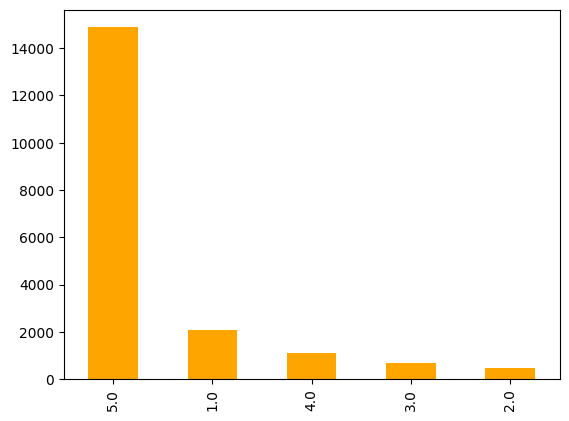

In [355]:
ax = df2['score'].value_counts().plot.bar(color = 'orange')

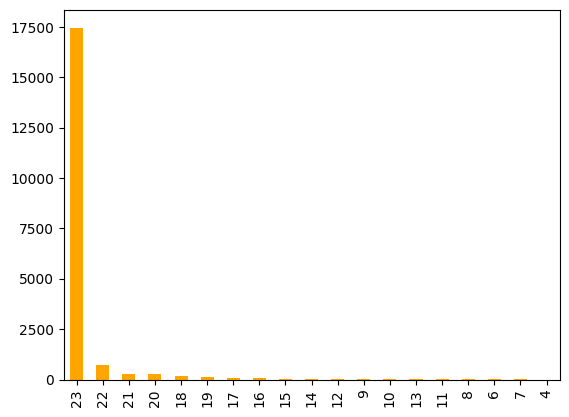

In [356]:
ax = df2['reviewCreatedVersion'].value_counts().plot.bar(color = 'orange')

<Axes: xlabel='score', ylabel='reviewCreatedVersion'>

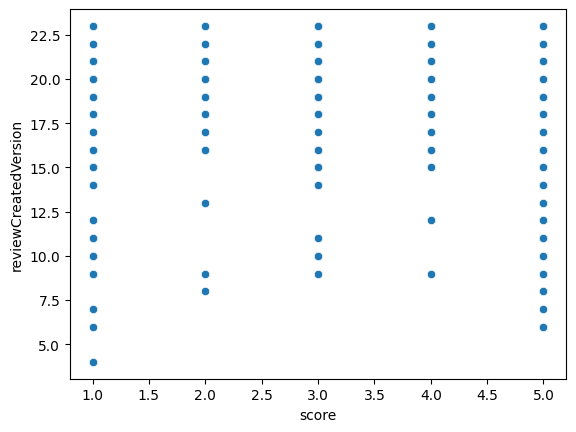

In [357]:
sns.scatterplot(x='score', y='reviewCreatedVersion', data=df2)

# **Statistical analysis**
ทำการวิเคราะห์ข้อมูลทางสถิติเพื่อใช้เป็นหลักฐานสนับสนุนการตัดสินใจทางธุรกิจ

In [358]:
# showing basic statistics
df2.describe()

,age,freqUse,hoursUseLastMonth,reviewCreatedVersion,score,thumbsUpCount
count,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000
mean,32.956668,3.620329,143.980926,22.698751,4.358316,2.535116
std,22.405252,1.317042,103.323859,1.293197,1.325830,74.934920
min,3.000000,0.000000,10.000000,4.000000,1.000000,0.000000
25%,16.000000,3.000000,62.000000,23.000000,5.000000,0.000000
50%,27.000000,4.000000,119.000000,23.000000,5.000000,0.000000
75%,46.000000,5.000000,200.000000,23.000000,5.000000,0.000000
max,102.000000,5.000000,692.000000,23.000000,5.000000,4310.000000


# **Hypothesis testing**
ทำการทดสอบสมมติฐานต่างๆ เพื่อสนับสนุนข้อมูลสถิติที่วิเคราะห์ได้ว่ามีนัยสำคัญอย่างไร (statistically significance)

- Null Hypothesis (**H0**): version ของ application ไม่ส่งผลต่อ score
- Alternative Hypothesis (**H1**): version ของ application ส่งผลต่อ score

In [359]:
df2['reviewCreatedVersion'].astype(int)

0        23
2        23
3        22
4        22
5        23
         ..
27519    23
27520    23
27522    23
27524    23
27526    23
Name: reviewCreatedVersion, Length: 19293, dtype: int64

In [360]:
new_version = df2.loc[(df2['reviewCreatedVersion'] >= 22), 'score']
old_version = df2.loc[(df2['reviewCreatedVersion'] < 22), 'score']

In [361]:
from scipy.stats import shapiro

data1 = new_version
stat, p = shapiro(data1)
if p > 0.05:
 print('normally distributed.')
else:
 print('not normally distributed.')

data2 = old_version
stat, p = shapiro(data2)
if p > 0.05:
 print('normally distributed.')
else:
 print('not normally distributed.')

data3 = df2['score']
stat, p = shapiro(data3)
if p > 0.05:
 print('normally distributed.')
else:
 print('not normally distributed.')

not normally distributed.
not normally distributed.
not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [362]:
from scipy.stats import levene

# Data is NOT normally distributed
stat, p = levene(data1, data2, center= 'median')
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print('Probably the same variances' )
else:
  print('Probably different variances' )

stat=93.290, p=0.000
Probably different variances


In [363]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

# ไม่ reject
if p > 0.05:
 print('Probably the same distribution' )

# reject
else:
 print('Probably different distributions' )

stat=11309125.000, p=0.000
Probably different distributions


สรุปว่า H0 จะถูก reject ออกไป หมายความว่า ตัว version ส่งผลต่อ score